    Hi Matas and Aiman,

    Thanks for the call today and sharing results and talking about the upcoming NNA proposal. I'm excited to work on this effort with you.

    Here is the location of the pingo that has started to collapse on the North Slope -  69.691226°, -152.765530°

    This photo is from 2017 and I think it started to collapse a couple of years prior to this. I flew over it again this past August and the crater is much bigger now. This is different from what is going on in Siberia with the gas emission craters but is also of interest as pingo degradation can be an indicator of climate change in permafrost regions.

![](./images/real.png)

In [23]:
import shapely.geometry
from shapely.ops import transform
import geopandas as gpd
import pyproj

### Reproject the latitude, longitude to match the ArcticDEM strip file

In [33]:
lon, lat = -152.765530, 69.691226
point = shapely.geometry.Point(-152.765530, 69.691226)

wgs84 = pyproj.CRS("EPSG:4326")
sea_ice_polar_stereographic_north = pyproj.CRS("EPSG:3413")
projection = pyproj.Transformer.from_crs(wgs84, sea_ice_polar_stereographic_north, always_xy=True).transform

reprojected = shapely.ops.transform(projection, point)



### Load Strip file

In [4]:
strips = gpd.read_file("./ArcticDEM_Strip_Index_Rel7/ArcticDEM_Strip_Index_Rel7.shp")

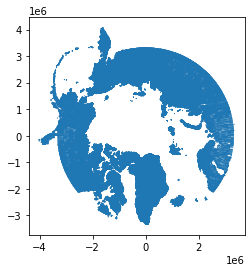

In [19]:
strips.plot()

### Filter the strip file

In [36]:
strips["valid"] = strips["geometry"].apply(lambda geom: geom.contains(reprojected))

In [37]:
strips["valid"].value_counts()

False    206526
True          6
Name: valid, dtype: int64

In [38]:
strips = strips[strips["valid"]]

In [42]:
for url in strips["fileurl"]:
    print(url)

http://data.pgc.umn.edu/elev/dem/setsm/ArcticDEM/geocell/v3.0/2m/n69w153/SETSM_WV02_20150513_10300100421EA800_103001004156E900_seg1_2m_v3.0.tar.gz
http://data.pgc.umn.edu/elev/dem/setsm/ArcticDEM/geocell/v3.0/2m/n69w153/SETSM_WV02_20130403_103001002014FA00_1030010021CD9100_seg1_2m_v3.0.tar.gz
http://data.pgc.umn.edu/elev/dem/setsm/ArcticDEM/geocell/v3.0/2m/n69w153/SETSM_WV02_20140312_103001002D376900_103001002E880E00_seg1_2m_v3.0.tar.gz
http://data.pgc.umn.edu/elev/dem/setsm/ArcticDEM/geocell/v3.0/2m/n69w153/SETSM_WV02_20160703_10300100576DE300_103001005916A300_seg1_2m_v3.0.tar.gz
http://data.pgc.umn.edu/elev/dem/setsm/ArcticDEM/geocell/v3.0/2m/n69w153/SETSM_WV02_20170515_1030010069D3A400_1030010069052700_seg1_2m_v3.0.tar.gz
http://data.pgc.umn.edu/elev/dem/setsm/ArcticDEM/geocell/v3.0/2m/n69w153/SETSM_WV03_20150513_104001000BC50400_104001000CC68D00_seg1_2m_v3.0.tar.gz


### View Images (from QGIS)

![](./images/2013-04-03.svg)
![](./images/2014-03-12.svg)
![](./images/2015-05-13.svg)
![](./images/2015-05-13_2.svg)
![](./images/2016-07-03.svg)
![](./images/2017-05-15.svg)